In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
%matplotlib notebook
import seaborn as sns

________
## <font color = dimgrey> Data import </font> 


In [5]:
#data_path = "https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata_2021.csv"

In [6]:
#Import the data here
data = pd.read_csv('shipdata2021_ex4') #data is presumed to be in the same folder. 
data.head()

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1377,64.3074,Hamina,Cargo,3416,94.91,15.34
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00
2,219082000,9.9416,74.6762,Hamina,Tanker,9980,141.20,21.90
3,219083000,11.6038,74.7529,Hamina,Tanker,9980,141.20,21.60
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00


_______________
## <font color = dimgrey> 1) Data preprocessing
Below are all the questions related to this topic, but you should put them under their own respective titles that are found below.

- a) First, find out how many different destinations there are in the data. Do you need to make any preprocessing? **1p** <br>
- b) Destination harbor is a categorical variable. It needs to be converted into a numerical representation. Explain, why do you need to make this step? You can use get_dummies from pandas to implement one-hot coding for categorical features **1p**

- c) Plot Gross tonnage versus the ship Length. Use different colors for different ship types. According to the plot, there is one <b> clear outlier. </b>  Correct the outlying value by changing it to the value 326 and rerun the plot after you have made the correction. **1p**
- d) It is good to exploit domain knowledge and make some reasonable transformation to the feature values to improve the expected results and/or to avoid redundancy. Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. You can find the needed information  https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried **1p**
- e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, the ***transformed length*** variable, and breadth **1p**
_______________________

#### <font color = dimgrey> a) Find out how many different destinations there are in the data. Are there any mistakes and do you need to do any preprocessing? Give your code and answer below **1p** </font>

In [7]:
### Code for 1.a) 
print('\033[1m'+'Number of unique destinations: ' + '\033[0m',data['Destination'].nunique())

duplicate = data[data.duplicated('MMSI')]
print("\n\n",'\033[1m'+ 'Duplicate vessel values :' + '\033[0m')
print(duplicate)

print("\n\n",'\033[1m'+ 'Data analysis:' + '\033[0m',"\n")
print(data.info())

print("\n\n", '\033[1m'+ 'Look for undefined:' + '\033[0m' ,"\n",data.isnull().sum())

Number of unique destinations:  16


 Duplicate vessel values :
Empty DataFrame
Columns: [MMSI, Speed, COG, Destination, Ship_type, Gross_tonnage, Length, Breadth]
Index: []


 Data analysis: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           134 non-null    int64  
 1   Speed          134 non-null    float64
 2   COG            134 non-null    float64
 3   Destination    134 non-null    object 
 4   Ship_type      134 non-null    object 
 5   Gross_tonnage  134 non-null    int64  
 6   Length         134 non-null    float64
 7   Breadth        134 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 8.5+ KB
None


 Look for undefined: 
 MMSI             0
Speed            0
COG              0
Destination      0
Ship_type        0
Gross_tonnage    0
Length           0
Breadth          0
dtype: int64


<font color = red> \*** Answer here ***
    <br><br> At first sight, there don't seem to be any mistakes, but as I was working on b), I have noticed that for the destination Sillamäe there is a typo that has been taken as a unique destination - Sillamae - at row 78. So, instead of 17 unique destinations we have only 16.<br><br>

____________
#### <font color = dimgrey> b) Destination harbor is a categorical variable. It needs to be somehow converted into a numerical expression. Explain, why do you need to make this step? 
You can use get_dummies from pandas to implement onehot coding for categorical features **1p**

In [8]:
### Code for 1.b)
dest = data['Destination'].unique()
#print(dest)

# ['Hamina' 'Helsinki' 'Kotka' 'Kronshtadt' 'Kunda' 'Muuga' 'Paldiski'
#  'Porvoo' 'Primorsk' 'Sillamäe' 'Sillamae' 'Tallinn' 'Ust-Luga'
#  'Valko-Loviisa' 'Viipuri' 'Vuosaari' 'Vysotsk']

# codes_dest=pd.get_dummies(dest)
# print(codes_dest)
# print(codes_dest['Hamina'])

#the code above has beed done as suggested by the tip in the exercise text, however, I find the output difficult to visualise
#and work with, since we would have a 17 bit code for each of the destinations. Since the data doesn't show that a ship is going
#to more harbours, there is no need for such codes. Thus, I have used a loop to give each harbour a code, from 1 to 17.

codes_dest = np.linspace(1,len(dest),len(dest))
for i,j in enumerate(dest):
    print(data.loc[data['Destination']==j,'Destination'], ' = ', codes_dest[i])
#by doing this type of analysis, I managed to see that all enteries have been groupped by destination, and for the destination 
#Sillamäe there is a typo that has been taken as a unique destination - Sillamae - at row 78



0     Hamina
1     Hamina
2     Hamina
3     Hamina
4     Hamina
5     Hamina
6     Hamina
7     Hamina
8     Hamina
9     Hamina
10    Hamina
11    Hamina
12    Hamina
13    Hamina
14    Hamina
15    Hamina
16    Hamina
17    Hamina
18    Hamina
Name: Destination, dtype: object  =  1.0
19    Helsinki
Name: Destination, dtype: object  =  2.0
20    Kotka
21    Kotka
22    Kotka
23    Kotka
24    Kotka
25    Kotka
26    Kotka
27    Kotka
Name: Destination, dtype: object  =  3.0
28    Kronshtadt
29    Kronshtadt
Name: Destination, dtype: object  =  4.0
30    Kunda
31    Kunda
Name: Destination, dtype: object  =  5.0
32    Muuga
33    Muuga
34    Muuga
35    Muuga
36    Muuga
37    Muuga
38    Muuga
39    Muuga
40    Muuga
41    Muuga
42    Muuga
43    Muuga
Name: Destination, dtype: object  =  6.0
44    Paldiski
45    Paldiski
46    Paldiski
47    Paldiski
48    Paldiski
49    Paldiski
50    Paldiski
51    Paldiski
52    Paldiski
Name: Destination, dtype: object  =  7.0
53    Porvoo
54   

<font color = red> \*** Answer here ***
    <br><br>The encoding of the attributes is normally done to receive valuable information about a certain object or to make it easier to plot and visualise a Data Matrix. Normally, for this type of attribute we should have used the onehot encoding so, for example, if a ship had two destinations, let's say Hamina, with the code 1000 and then Helsinki, with the code 0001, the ship would have had the code 1001 for it's destination in every instance, and then we could reduce the number of insances of that ship introduced into the data set to 1. However, since we don't have different enteries for the same ship, there is no need to use the onehot encoding, especially since we would have had 16 bit numbers instead of destinations, which would have made the data a bit more difficult to visualise. Thus, I chose to encode the destinations as numbers, from 1 to 16, especially because I have noticed that all enteries have been groupped by destination in the given order.<br><br>

In [9]:
data['Destination'] = data['Destination'].replace("Sillamae", "Sillamäe")
print("Number of unique destinations: ",data['Destination'].nunique())

data_copy = data.copy(deep=True) #so we don't make any changes directly on the original data frame

# remake b)
dest = data_copy['Destination'].unique()


#print(dest) - to see if the change has been made, the rest of the results from a remain the same

#remake the codes for each destination
codes_dest = np.linspace(1,len(dest),len(dest))

#check that each one has been attributed correctly


for i,j in enumerate(dest):
    data_copy.loc[data_copy['Destination'] == j,'Destination'] = codes_dest[i]

#check the changes and the new data frame    
#print(dest)
#print(codes_dest)
data_copy.head()
#data.head()


Number of unique destinations:  16


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1377,64.3074,1.0,Cargo,3416,94.91,15.34
1,212436000,13.5256,77.0755,1.0,Tanker,6280,116.90,18.00
2,219082000,9.9416,74.6762,1.0,Tanker,9980,141.20,21.90
3,219083000,11.6038,74.7529,1.0,Tanker,9980,141.20,21.60
4,219426000,11.9203,56.3253,1.0,Tanker,3219,99.90,15.00


_______________
####  <font color = dimgrey> c) Plot Gross tonnage versus the ship Length. 

- Use different colors for different ship types. According to the plot, there is one <b> clear </b> outlier. <b> Correct the outlying value by changing it to the value 326 </b> and rerun the plot after you have made the correction. **1p**
- If you want to do things very nicely you could wrap the plotting in a function so you don't paste the same code twice, but this is not required.

<IPython.core.display.Javascript object>


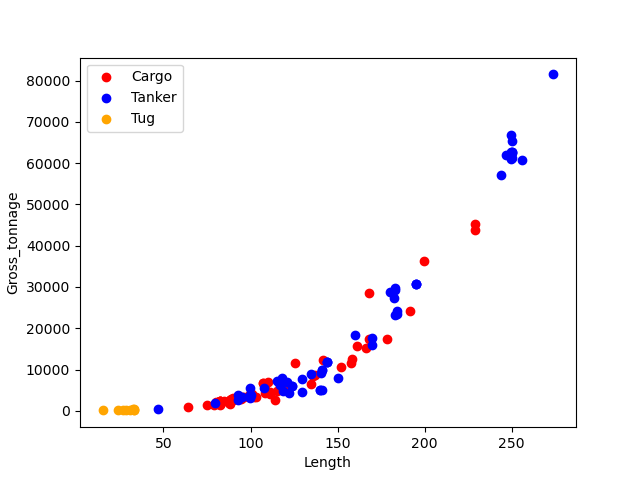

In [10]:
### Code for 1 c) plot with the outlier 


plt.figure()

plt.scatter((data_copy.loc[data_copy['Ship_type'] == "Cargo"])["Length"],
            (data_copy.loc[data_copy['Ship_type'] == "Cargo"])["Gross_tonnage"],
            color='red',label="Cargo")


plt.scatter((data_copy.loc[data_copy['Ship_type'] == "Tanker"])["Length"],
            (data_copy.loc[data_copy['Ship_type'] == "Tanker"])["Gross_tonnage"],
            color='blue',label="Tanker")

plt.scatter((data_copy.loc[data_copy['Ship_type'] == "Tug"])["Length"],
            (data_copy.loc[data_copy['Ship_type'] == "Tug"])["Gross_tonnage"],
            color='orange',label="Tug")

plt.xlabel('Length')
plt.ylabel('Gross_tonnage')
plt.legend()
plt.show()

In [11]:
#We can see that the outlier is of type Tanker and is situated somwhere bellow a vallue higher than 50 but smaller than 100

data_copy.loc[(data_copy.loc[data_copy['Ship_type'] == "Tanker"]).loc[data_copy['Length'] < 70].index,'Gross_tonnage'] = 326

<IPython.core.display.Javascript object>


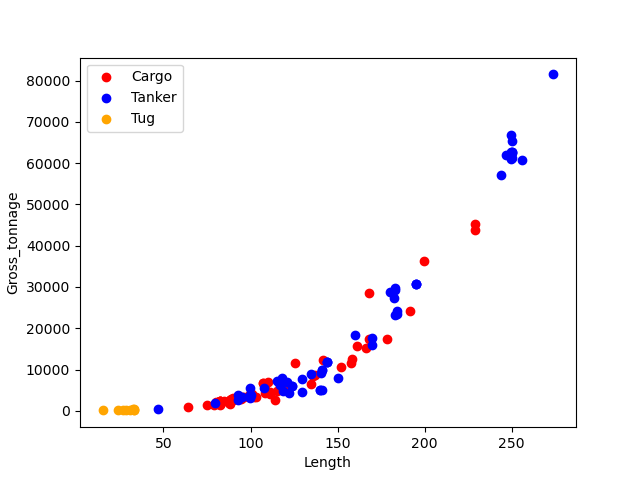

In [12]:
### Code for 1 c) rerun the plot with the correction made
plt.figure()

plt.scatter((data_copy.loc[data_copy['Ship_type'] == "Cargo"])["Length"],
            (data_copy.loc[data_copy['Ship_type'] == "Cargo"])["Gross_tonnage"],
            color='red',label="Cargo")


plt.scatter((data_copy.loc[data_copy['Ship_type'] == "Tanker"])["Length"],
            (data_copy.loc[data_copy['Ship_type'] == "Tanker"])["Gross_tonnage"],
            color='blue',label="Tanker")

plt.scatter((data_copy.loc[data_copy['Ship_type'] == "Tug"])["Length"],
            (data_copy.loc[data_copy['Ship_type'] == "Tug"])["Gross_tonnage"],
            color='orange',label="Tug")

plt.xlabel('Length')
plt.ylabel('Gross_tonnage')
plt.legend()
plt.show()

#### <font color = dimgrey> d) Exploit your domain knowledge and transform to improve the expected results and/or to avoid redundancy. 
- Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. Plot the situation after the transformation **1p** 
- You can find the needed information in for example https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried
  

<IPython.core.display.Javascript object>


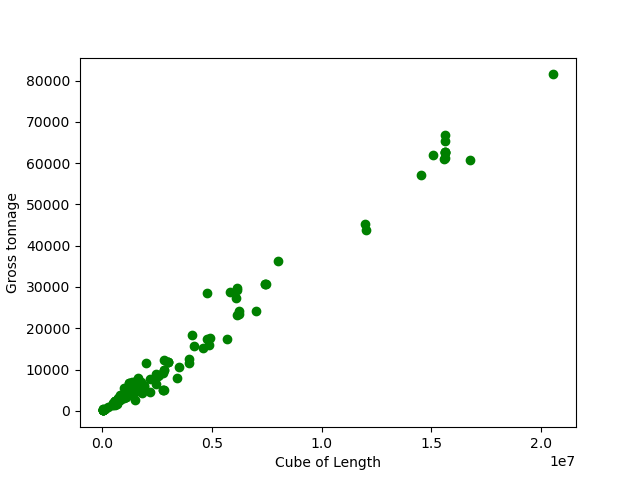

In [13]:
### Code for 1d

#given the Wikipedia link, in order to have a liniar plot for gross tonnage, we would need the volume of the ship. Since
#we only have the Length, the closest thing we can do is treat the ship like a cube and compute the volume from Length
new_len= data_copy['Length']**3

plt.figure()
plt.xlabel("Cube of Length")
plt.ylabel("Gross tonnage")
plt.scatter(new_len,data_copy['Gross_tonnage'], color='green')
plt.show()



In [14]:
#make a new copy of the data frame to make the changes
data_copy2 = data_copy.copy(deep=True)
data_copy2 = data_copy2.rename(columns={'Length': 'Length_cubed'})
data_copy2['Length_cubed'] = new_len
data_copy2.head()

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length_cubed,Breadth
0,212209000,10.1377,64.3074,1.0,Cargo,3416,8.549406e+05,15.34
1,212436000,13.5256,77.0755,1.0,Tanker,6280,1.597510e+06,18.00
2,219082000,9.9416,74.6762,1.0,Tanker,9980,2.815167e+06,21.90
3,219083000,11.6038,74.7529,1.0,Tanker,9980,2.815167e+06,21.60
4,219426000,11.9203,56.3253,1.0,Tanker,3219,9.970030e+05,15.00


<font color = red> \*** Answer here *** what does gross tonnage mean? What transformation did you do? Why is it useful? 
<br><br> Gross tonnage is a ship attribute that represents the overall internal volume enclosed by the margins of a ship. It is a non-linear measure for the internal volume of the ship and is computed by multiplying the ship's total volume in cubic metres and a multiplier based on the ship volume. Given the fact that we had to linearise the relation between the Gross_tonnage and the ship Length, I chose to treat the volume of the ship like a cube and compute it by cubing the Length attribute. If the correlation between these two values stands as in the definition, then we can make some assumptions based on the data, for example, if the Length and, implicitly, the cubed Length are increasing, then the Gross_tonnage should be increasing as well.<br><br>

#### <font color = dimgrey> e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, transformed length, and breadth **1p**

In [15]:
### Code for 1e

data_copy2[['Speed', 'Length_cubed', 'Breadth']] = StandardScaler().fit_transform(data_copy2[['Speed', 'Length_cubed', 'Breadth']])
data_copy2.head()

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length_cubed,Breadth
0,212209000,-0.161299,64.3074,1.0,Cargo,3416,-0.569303,-0.489104
1,212436000,1.580209,77.0755,1.0,Tanker,6280,-0.405892,-0.220696
2,219082000,-0.262102,74.6762,1.0,Tanker,9980,-0.137933,0.172834
3,219083000,0.592331,74.7529,1.0,Tanker,9980,-0.137933,0.142563
4,219426000,0.755024,56.3253,1.0,Tanker,3219,-0.538041,-0.523412


______________
## <font color = lightcoral>2. Classification </font> 

Predict the **ship type** using **speed, destination, transformed length, and breadth** as features. Find an estimation for the classification accuracy (number of correctly classified ships to the total number of ships) using **random training and test sets**. <br>

Below is a summary of exercises for part 2
- a) Produce training and test data **1p**
     - Gather the normalized features and one-hot-coded destination columns as array __X__ (input variables), and the ship type as array **y** (output variable)     
     - Divide the data randomly into training (80%) and test (20%) sets
     - Do you need to use stratification? **Explain your decision**
- b) Train the model and test its performance **1p**
     - Use kNN classifier with k=3
     - Print out the confusion matrix. How does the model perform with different ship types?
     - What is the (total) classification accuracy?
 - Repeat the calculation 1000 times with different split of training/test data, and make a histogram of the results for classification accuracy **1p**
 - Discuss your results **1p**
 
 ______________

#### <font color = lightcoral> a) Produce training and test data 1p
- Gather the normalized features and one-hot-coded destination columns as array X (input variables), and the ship type as array y (output variable)
- Divide the data randomly into training (80%) and test (20%) sets
- Do you need to use stratification? **Explain your decision**

<IPython.core.display.Javascript object>


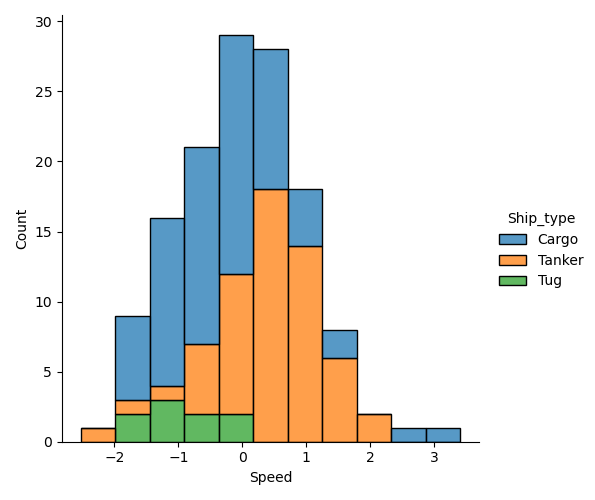

<IPython.core.display.Javascript object>


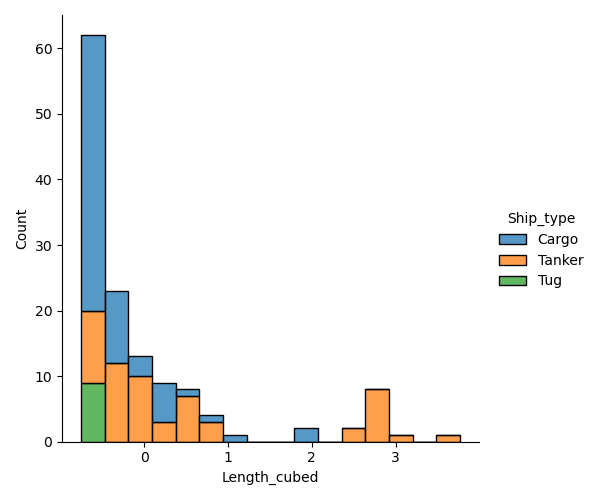

<IPython.core.display.Javascript object>


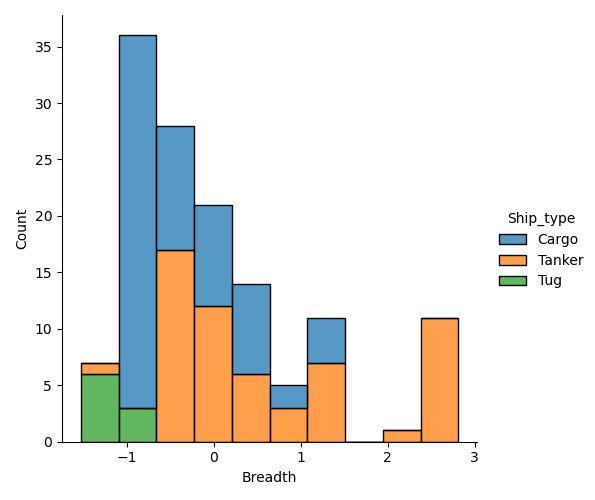

In [16]:
### Code for 2a

X = data_copy2[['Speed', 'Length_cubed', 'Breadth']].values
y = data_copy2[['Ship_type']].values

#plot to visualise the data
sns.displot(data_copy2, x="Speed", hue="Ship_type", multiple="stack")
sns.displot(data_copy2, x="Length_cubed", hue="Ship_type", multiple="stack")
sns.displot(data_copy2, x="Breadth", hue="Ship_type", multiple="stack")

plt.show()
#the distribution over ship types seems to be off, Tug has few values overall, so stratification may be good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8, stratify=y)



<font color = red> \*** Answer here (do you need to use strafication? Explain your decision) ***
    <br><br> After plotting, we can observe the fact that many values overlap and may be confused with one another, not to mention the fact that the attribute "Tug" has very few values which are completely overlapped with the values from "Tanker" and "Cargo". Thus, in order to make sure that we are taking into consideration every attribute equally, it is a good idea to use stratification. <br><br>

_______________
#### <font color = lightcoral> b) Train the model and test its performance 1p
- Use a kNN classifier with k=3
- Print out the confusion matrix. <br>
- How does the model perform with different ship types? Where do you think the differences come from?<br>
- What is the (total) classification accuracy?

In [17]:
def accuracy (predicted, test):
    acc=0
    cnt=0
    for i in range(len(test)):
        if (predicted[i] == test[i]):
            cnt = cnt + 1
        acc=100*cnt/len(test)
    return(acc)

In [18]:
### Code for 2b
clasf = KNeighborsClassifier(n_neighbors=3)
y_prediction=clasf.fit(X_train, y_train.ravel()).predict(X_test)
print("Cofusion matrix : \n", metrics.confusion_matrix(y_test, y_prediction))


Cofusion matrix : 
 [[13  0  0]
 [ 2 10  0]
 [ 1  0  1]]


In [19]:
print("(Total) Classification accuracy:  ",accuracy(y_prediction,y_test)," %")

(Total) Classification accuracy:   88.88888888888889  %


<font color = red> \*** Answer here *** - Discuss your results. What can you see? What do you think is relevant?
    <br><br> The code I have used takes at random different samples of the three ship types to use as train or test groups. After running the code multiple times, I noticed that both the confusion matrix and the total classification accuracy change, however, the accuracy value revolves around 70%. These differences appear beacause we take a number of different random samples to use in our groups each time from all the three attributes ("Tanker", "Cargo", "Tug"), so of course we will have some good predictions sometimes and some wrong predictions in other instances, but the important is the fact that the genaral Total Classification accuracy is high each time.<br><br>

__________
## 3. <font color = navy> Classification accuracy using leave-one-out cross validation

Again, predict the **ship type** using **speed, destination, transformed length, and breadth** of the ship as features. Find an estimation for the classification accuracy using *leave-one-out cross validation (LOO CV)*. <br>

 - a) Use leave-one-out cross validation to estimate the model performance **1p**
     - Use kNN classifier with k=3
     - What is the classification accuracy? Compare the result with the one you got in the previous task
 - b) Which method gives better evaluation of the performance of the classifier with this data set? Explain your choice **1p**

In [20]:
def acc_loo(dom, k):
    A=0
    n=0
    for train_index, test_index in LeaveOneOut().split(dom):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train.ravel()).predict(X_test)#could be done in one line
        c=0
        for i in range(len(y_test)):
            if (predicted[i] == y_test[i]):
                c = c + 1
            A= A+c
            n=n+1
    acc_loo=100*A/n
    return(acc_loo)


In [21]:
def accur(m,n):
    acc=100*m/n
    return(acc)
#Python wasn't reading sklearn.metrics,accuracy_score. Made my own

In [22]:
### Code for 3

print("Total classification accuracy (leave-one-out): ",acc_loo(X,3)," %") 


Total classification accuracy (leave-one-out):  74.6268656716418  %


#### a) <font color = navy> What is the classification accuracy? Compare the result with the one you got in the previous task **1p**

<font color = red> \*** Answer here *** 
    <br><br> For the Leave-One-Out algorithm we have an accuracy of around 74%, which is good enough. Compared to the result of the previous point, this accuracy may not always be the best, but it certainly is the most steady, considering that the result stays the same at each run of the programme, while the other doesn't.<br><br></font>
    
#### b) <font color = navy>  Which method gives better evaluation of the performance of the classifier with this data set? Why? 1p

<font color = red> \*** Answer here ***
    <br><br>The Leave-One-Out method gives the best evaluation of the performance of the classifier. This is due to the fact that the result stays constant, while for the simple classifier we have a different result at each run of the program, so we can't be sure which is the correct value.<br><br></font>

____________
## <font color = forestgreen> 4. Model selection with leave-one-out cross validation

- a) Select the best model (kNN with selection of k) using leave-one-out cross validation (Repeat the model performance estimation with values k=1...30). Which value of k produces the best classification accuracy? **2p**
- b) If the number of k is still increased, what is the limit that the **1p** classification accuracy approaches? Why?
- d) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p** 

In [26]:
# Code for 4
array = [None]*30

for k in range(1,31):

    array[k-1] = acc_loo(X,k)
    print("Accuracy for k=",k," is ",acc_loo(X,k)," %")
    accuracy_loo=acc_loo(X,k) 

Accuracy for k= 1  is  78.35820895522389  %
Accuracy for k= 2  is  72.38805970149254  %
Accuracy for k= 3  is  74.6268656716418  %
Accuracy for k= 4  is  75.3731343283582  %
Accuracy for k= 5  is  74.6268656716418  %
Accuracy for k= 6  is  73.88059701492537  %
Accuracy for k= 7  is  74.6268656716418  %
Accuracy for k= 8  is  72.38805970149254  %
Accuracy for k= 9  is  72.38805970149254  %
Accuracy for k= 10  is  68.65671641791045  %
Accuracy for k= 11  is  71.64179104477611  %
Accuracy for k= 12  is  70.14925373134328  %
Accuracy for k= 13  is  71.64179104477611  %
Accuracy for k= 14  is  70.8955223880597  %
Accuracy for k= 15  is  70.14925373134328  %
Accuracy for k= 16  is  69.40298507462687  %
Accuracy for k= 17  is  70.14925373134328  %
Accuracy for k= 18  is  68.65671641791045  %
Accuracy for k= 19  is  69.40298507462687  %
Accuracy for k= 20  is  67.91044776119404  %
Accuracy for k= 21  is  70.14925373134328  %
Accuracy for k= 22  is  67.91044776119404  %
Accuracy for k= 23  is  

#### <font color = forestgreen>  a) Which value of k produces the best classification accuracy? **1p**</font>

<font color = red> \*** Answer here ***
    <br><br> The smaller values of k (k=1, k=2, k=3, etc) produce the best classification accuracy. This is due to the fact that a small k leads to overfitting which in turn leads to a small generalization of the data.<br>

#### <font color = forestgreen> b) If the number of k is still increased, what is the limit that the classification accuracy approaches? Why?

<font color = red> \*** Answer here ***
    <br><br> As k increases, we see that the classification accuracy reaches a limit of around 50-60% and doesn't go any lower than that. This happens because we are tanking more data into accound, thus making the model less flexible.<br>

#### <font color = forestgreen> c) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p**

<font color = red> \*** Answer here ***
    <br><br> Normally, the LOOCV algorithm is quite taxing when it comes to the resources of the system, especially if we have a large data set. However, as long as we mentain the number of enteries within reasonable parameters, the model should perform quite well, given the fact that we need to choose an apropriate k for the algorithm. Since we don't want neither an overfitting nor an underfitting model, the value of k should be around the middle of the given interval (1 to 30) since we can see that the accuracy scores tend to get a bit more stable around there ( the differences between them aren't that great). 
    <br>Further research actually shows that the value k=10 is quite common for this algorithm because, given extensive testing, 10-fold cross-validation provides a good balance of low computational cost and low bias in the estimate of model performance as compared to other k values and a single train-test split.(source: https://tinyurl.com/ycdffmbt).
    <br> For our case, the value k=10 doesn't seem the best choice since it yealds a quite low accuracy, so k=11 may be a more sensible choice<br><br>

________________
### <font color = red>  5. Testing with training data <font color = red> (this should never be done out of this exercise!) </font>

- Repeat the previous task but use the whole data for training **2p**
- Plot the resulting classification accuracy versus k=1...30. **Include the values from the previous task in the same figure**
- Comment your result. **Why** shouldn't you test with training data?

In [27]:
### CODE FOR 5: Repeat the previous task but use whole data for training
field = [None]*30

for k in range(1,31):
    y_prediction = KNeighborsClassifier(n_neighbors=k).fit(X, y.ravel()).predict(X)
    field[k-1] = accuracy(y_prediction,y)
    print(k,". ",accuracy(y_prediction,y), " %")
    accuracy_training_data=accuracy(y_prediction,y)

1 .  100.0  %
2 .  88.80597014925372  %
3 .  87.31343283582089  %
4 .  83.58208955223881  %
5 .  81.34328358208955  %
6 .  79.1044776119403  %
7 .  78.35820895522389  %
8 .  79.1044776119403  %
9 .  78.35820895522389  %
10 .  76.11940298507463  %
11 .  73.88059701492537  %
12 .  74.6268656716418  %
13 .  72.38805970149254  %
14 .  73.88059701492537  %
15 .  73.13432835820896  %
16 .  72.38805970149254  %
17 .  70.8955223880597  %
18 .  73.13432835820896  %
19 .  72.38805970149254  %
20 .  71.64179104477611  %
21 .  71.64179104477611  %
22 .  72.38805970149254  %
23 .  71.64179104477611  %
24 .  70.8955223880597  %
25 .  70.14925373134328  %
26 .  70.8955223880597  %
27 .  70.14925373134328  %
28 .  69.40298507462687  %
29 .  70.14925373134328  %
30 .  69.40298507462687  %


<IPython.core.display.Javascript object>


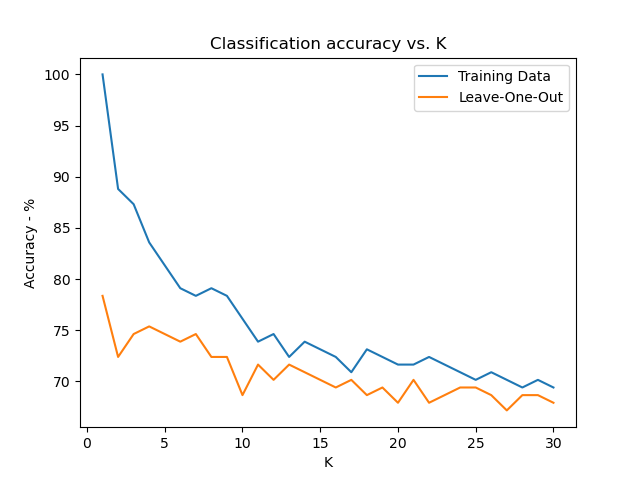

In [30]:
### CODE FOR 5: The plot
k = np.linspace(1,30,30)
plt.figure()
plt.title("Classification accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Accuracy - %")

plt.plot(k, field,label="Training Data")
plt.plot(k,array,label="Leave-One-Out")

plt.legend()
plt.show()


 <font color = red> \*** Answer here ***
    <br><br> When testing with the training data, we can see that we have some instances of 100% accuracy. This tells us that our model is getting each guess right. Although at first glance this would be an ideal result, testing with the training data doesn't show us anything else but the power to memorise of our model. We are more interested to see if our model actually understands the trend of the data, so if we were to feed it new, unknown data enteries, it should know what to do and make most of the guesses correctly.<br><br>